## Midterm Exam - Peizhi Zhang

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

# Supress Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pd.options.display.max_rows = 10

### Use the spam dataset and variable descriptions in the files/Mid-Term Exam folder of the course website to answer the following questions. 

### 1.  Import the spam dataset and print the first six rows.  

In [3]:
df = pd.read_csv("/Users/peizhi/Documents/Machine learning/spam_dataset.csv")
df.head(n=6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


### 2.  Read through the documentation of the original dataset here:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

I believe that "char_freq_#:","word_freq_hp", and "word_freq_meeting" are three variables in the dataset that will be important predictors. First, in the non-spam emails, people rarely write hashtag (#) to send a message to colleague or someone that is close to them; mostly in the spam emails, there will be hashtags to promote something or display as an ad slogan. Second, in the csv file, the word "hp" rarely appears in the first 1814 rows, which are the rows for spam = 1, while in the following rows that indicate non-spam emails, the percentage are much higher overall. Third, "meeting" is a word usually used in a professional setting, which will be a good indicator of non-spam letters. 

### 3.  Visualize the univariate distribution of each of the variables in the previous question.  

Text(0, 0.5, 'count')

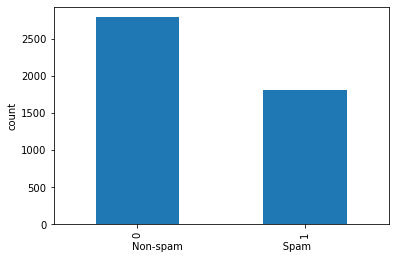

In [4]:
# Dependent Variable
import matplotlib.pyplot as plt
import seaborn as sns
df['spam'].value_counts().plot.bar()
plt.xlabel('Non-spam                                Spam')
plt.ylabel('count')

Text(0.5, 0, 'frequency of hashtag occurance in emails')

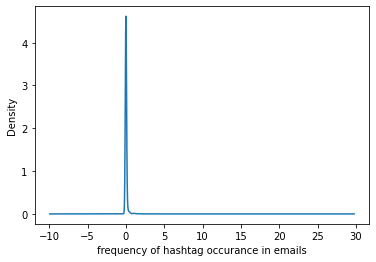

In [5]:
# Independent Variables
df['char_freq_#:'].plot(kind='density')
plt.xlabel('frequency of hashtag occurance in emails')

Text(0.5, 0, 'frequency of the word "hp" in emails')

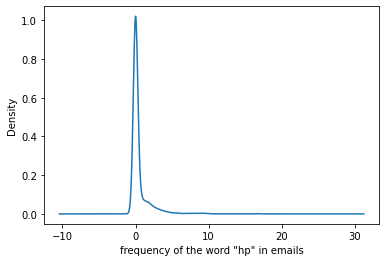

In [6]:
df['word_freq_hp:'].plot(kind='density')
plt.xlabel('frequency of the word "hp" in emails')

Text(0.5, 0, 'frequency of the word "meeting" in emails')

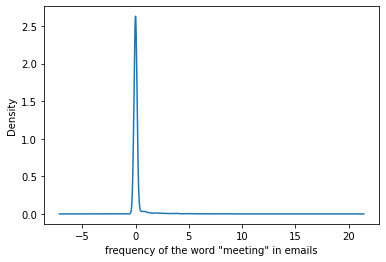

In [7]:
df['word_freq_meeting:'].plot(kind='density')
plt.xlabel('frequency of the word "meeting" in emails')

### 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".

Since "spam" is a categorical variable in a categorical model, the supervised learning models that can be used to predict "spam" are logistic regression, k nearest neighbor for classification model, decision tree, support vector machines, and penalized logistic regression (in which "penalty = none" is Lasso regression and "penalty does not equal to none" is Ridge regression). 

A logistic regression model can be used to predict a binary outcome or categorical dependent variable with code as 1 (=yes), and 0 (=no), by plotting the depedent variable's probability scores. We can use fitted logistic regression model to predict if an email is spam or non-spam by predicting the class membership probabilities of the new observations. 

A penalized logistic regression can predict categorical outcomes the same way as logistic regression models, but with additional constraints to the model. By adding a lamda/alpha, it constrains the size of the coefficients, in order to have a shrinking effect on the variables that do not contribute to the prediction task.

A classification model with k nearest neighbor parameter can predict if an email is spam or non-spam by defining k value and calculating the new observation's similarity to "spam" using distance measurement. 

A support vector machine is used for predicting categorical variables by mapping the independent variables to dependent variable, in which the decision boundary separates different classes. 

A decision tree uses tree-structured classifier to represent the data set and the decision rules. It is able to predict categorical variable "spam" by calculating the average of the value of being "spam" in a specific leaf node. With iterations, it can predict a final value for the new independent data points. 

### 5. Describe the importance of training and test data.  Why do we separate data into these subsets?

In a supervised learning model, we split data into training data and test data with random test split. This process will produce four outputs, including X_train, y_train, X_test, y_test. Setting up data objects into training and test data subsets is important because we can have, for example, 75% of training data used for fitting the model/training the algorithm, and 25% of test data can be held out to predict on X_test data and evaluate on y_test data using the fitted model, so that we can eventually evaluate how well the model can perform on unseen data. In other words, we use training data to generate machine learning models with attributes such as Euclidean distance; we then score on the test data using the fitted model to generate predictions on new data. We care about the accuracy of test_scores the most because we want to predict the unseen data, not the train_score. There could be instances where overfitting models exist, as we are focusing only on the training data, and having better predictive power on the training data, but at some point, we will lose the signal of the held out information (test data). To predict well across all observations, we need both training and test data.

### 6. What is k-fold cross validation and what do we use it for?

K-fold cross validation is a better method to evaluate a model than the simple train_test_split because in k-fold cross validation, through iteration of fitting the model with different data, the average of metrics offers a better benchmark for the performance for the model. In addition, we could encounter issues of overfitting models and underfitting models when we are focusing too much on the training model or fitting on the test data. In order to have maximum amount of training data to fit the model as well as maximum amount of test data for scoring the unseen data, we use k-fold cross validation. With K-fold CV, there is no repeated observations, but a repeated process of train_test_split with maximum amount of data to train on and test on. 

K-fold cross validation is the default method that we use to validate the stability of the ML model, to see if the model is overfit or not based on the n metrics results and metrics' mean. First we use train_test_split method to have, for example, 80% of training data and 20% of held out test data. Then, we do the cross validation among the 80% of the training data. If k-fold (n_splits = 5), we split the training data into 5 folds, in which we train on 4 folds of the data, and then validate on 1 fold of the data. We get the evaluative metric (aka: accuracy in this case) on the validated data. Next, we repeat the same process on a different fold of data as validation data, while using the rest of 4 folds as training data. We get another accuracy metric from the model. Eventually, we average out the five evaluative metrics to get the robust metric. In a way, we are using all the data for training and testing, without repetition. 


### 7. How is k-fold cross validation different from stratified k-fold cross validation?

Stratified k-fold cross validation makes sure the relative class frequencies in each fold are proportional to the relative class frequencies on the whole datasets. For instance, for k-fold cross validation, we split the training data into 3 folds; for stratified k-fold cross validation, we further break down into 3 subsets for each of the 3 folds. In this way, we can avoid the imbalance of classes for the dependent variables in the k-fold cross validation. 

In the stratified k-fold cross validation, we have leave-out-out CV and repeated k-fold CV. For repeated k-fold CV, we apply k-fold or stratified k-fold validation multiple times with shuffled data. That is to say, we split the training data into 5 folds and get the average metric from each validation data and training data. Then, we shuffle the data again to have 5 folds of different observations and get the new average metric. In this case, we can do 10 times/shuffles, to get the average of 50 accuracy metrics to avoid the issue of randomization that can still exists in cross validation. Because for the cross validation, we can still have a sample from test data that does not contribute to the prediction of the unseen data. With repeated k-fold cross validation, we can get even more robust metric than stratified k-fold. 

### 8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  

In [8]:
# select only three independent variables
d = df [['char_freq_#:','word_freq_hp:','word_freq_meeting:','spam']].copy()
print(d.head(n=5))

#split data into training and test subsets
y = d['spam']
X = d.loc[:, d.columns !='spam']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

   char_freq_#:  word_freq_hp:  word_freq_meeting:  spam
0         0.000            0.0                 0.0     1
1         0.048            0.0                 0.0     1
2         0.010            0.0                 0.0     1
3         0.000            0.0                 0.0     1
4         0.000            0.0                 0.0     1


In [9]:
import warnings
warnings.filterwarnings("ignore")
#Scale the data for KNN Classifier

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Scaled KNN for Classification Using K-fold Cross-Validation

# GridSearchCV with KNN for Classification

from sklearn.model_selection import GridSearchCV
knn_param_grid = {'n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid).fit(X_train_scaled, y_train)

print("KNN for REGRESSION (GridSearchCV)")
print("Best Parameter: {}".format(knn_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("Test set Score: {:.3f}".format(knn_grid.score(X_test_scaled, y_test)))

from sklearn.neighbors import KNeighborsClassifier

print("")
print("KNN CLASSIFER (SCALED DATA)")
knn_scaled = KNeighborsClassifier(n_neighbors = 9).fit(X_train_scaled, y_train)

# Evaluate prediction error on test data directly 

print("Test set score: {:.3f}".format(knn_scaled.score(X_test_scaled, y_test)))
print("accuracy: "+str(knn_scaled.score(X_test_scaled, y_test)))
y_pred = knn_scaled.predict(X_test_scaled) 
y_pred

# Evaluate prediction error on k-fold CV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

from statistics import mean 

kfold = KFold(n_splits=9)
rkf = RepeatedKFold(n_splits=9, n_repeats=10)

print("RepeatedKFold:\n{}".format(
    mean(cross_val_score(knn_scaled, X_train, y_train, cv=rkf))))

print("Mean Cross Validation, KFold: {:.3f}".format(
    np.mean(cross_val_score(knn_scaled, X_train_scaled, y_train))))

KNN for REGRESSION (GridSearchCV)
Best Parameter: {'n_neighbors': 9}
Best Cross-Validation Score: 0.675
Test set Score: 0.665

KNN CLASSIFER (SCALED DATA)
Test set score: 0.665
accuracy: 0.6646394439617723
RepeatedKFold:
0.664282271419592
Mean Cross Validation, KFold: 0.675


I chose KNeighborsClassifier(n_neighbors=9) because odd numbers are better to break any ties in majority votes, and through tuning the model, the best parameter for this model is 9. However, the cross-validation score and the test set score are both low. The reason might be because the parameter is too high, which increases the complexity of running the model. When k is larger than 5, the model may become less efficient and slows down the prediction model. In this dataset of 4601 samples, smaller file size may predict more quickly, which is why I will use smaller parameter for the models below. 

After evaluating the model, it turns out that knn for classification model did not fit very well on the test data, and the mean accuracy metric is also low (=0.675). The reason for that might be due to the variables are not best at predicting spam emails. 

### 9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

In [50]:
# Logistic Regression Model

import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# GridSearch CV with Logistic Regression Model

logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_grid = GridSearchCV(LogisticRegression(penalty='none'), logreg_param_grid).fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (GridSearchCV)")
print("Best Parameter: {}".format(logreg_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(logreg_grid.best_score_))
print("Test set Score: {:.3f}".format(logreg_grid.score(X_test_scaled, y_test)))

print('')
print("LOGISTIC REGRESSION (UNSCALED DATA)")

logreg = LogisticRegression(C=0.001, penalty = 'none').fit(X_train_scaled, y_train)
# Evaluate prediction error on test data directly

print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
y_pred2 = logreg.predict(X_test_scaled)
print("Accuracy:",logreg.score(X_test_scaled, y_test))

# Evaluate prediction error on k-fold CV

print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg, X_train_scaled, y_train))))

# Model coefficients
logreg_coef = pd.DataFrame(data=logreg.coef_, columns=X.columns, index=['Logistic Regression Coefficients'])
logreg_coef.head()

LOGISTIC REGRESSION (GridSearchCV)
Best Parameter: {'C': 0.001}
Best Cross-Validation Score: 0.689
Test set Score: 0.656

LOGISTIC REGRESSION (UNSCALED DATA)
Test set score: 0.656
Accuracy: 0.6559513466550826
Mean Cross Validation, KFold: 0.689


,char_freq_#:,word_freq_hp:,word_freq_meeting:
Logistic Regression Coefficients,1.412689,-4.960798,-2.832322


In the logistic regression model, I chose C=0.001 for the parameter because through tuning the model, the best parameter is 0.001. A small "C" parameter suggests stronger regularization strength of the model, so that the model is better at predicting the unseen data. As it is displayed from the kfold value, which is 0.689 and higher than the previous model.  

The test score is the same as KNN model for classification. The k fold cross validation (=0.689) is higher than the one from previous model, which means that the accuracy metrics' average is higher for logistic regression model. Overall, this second model predict a little better than the previous model.

### 10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

In [49]:
# GridSearchCV with L1 Penalized Logistic Regression

from sklearn.model_selection import GridSearchCV
pen_logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pen_logreg_grid_l1 = GridSearchCV(LogisticRegression(penalty='l1', solver = 'liblinear'), 
                                  pen_logreg_param_grid).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION - L1 (SCALED DATA)")
print("Best Parameter: {}".format(pen_logreg_grid_l1.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid_l1.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid_l1.score(X_test_scaled, y_test)))

PENLIZED LOGISTIC REGRESSION - L1 (SCALED DATA)
Best Parameter: {'C': 10}
Best Cross-Validation Score: 0.689
Test set Score: 0.656


In [51]:
# L1 Penalized Logistic Regression Model (Lasso)
pen_logreg_scaled_l1 = LogisticRegression(C=10, penalty = 'l1', 
                                          solver = 'liblinear').fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION - L1 (SCALED DATA)")

# Evaluate prediction error on test data directly

print("Test set score: {:.3f}".
      format(pen_logreg_scaled_l1.score(X_test_scaled, y_test)))

print("Accuracy:",pen_logreg_scaled_l1.score(X_test_scaled, y_test))

# Stratified Kfold Cross Validation 
print("Mean Cross Validation, KFold: {:.3f}".format(
    np.mean(cross_val_score(pen_logreg_scaled_l1, X_train_scaled, y_train))))


PENALIZED LOGISTIC REGRESSION - L1 (SCALED DATA)
Test set score: 0.656
Accuracy: 0.6559513466550826
Mean Cross Validation, KFold: 0.689


The parameter I chose for L1 penalized logistic regression is C = 10 because of the best parameter from GridSearchCV, with a less strong regularization strength than the previous model. 

With a less strong regularization on the model, the Lasso model did not improve as the test score and kfold score is still the same. The model still did not predict better because the independent variables I used might not be the most ideal, and could not predict spam very well. 

### 11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Evaluate prediction error, did this model predict better than your previous models?

In [53]:
#GridSearchCV with L2 Penalized Logistic Regression

pen_logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pen_logreg_grid_l2 = GridSearchCV(LogisticRegression(), pen_logreg_param_grid).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION - L2 (GridSearchCV)")
print("Best Parameter: {}".format(pen_logreg_grid_l2.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid_l2.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid_l2.score(X_test_scaled, y_test)))

# L2 Penalized Logistic Regression Model (Ridge)

pen_logreg_scaled_l2 = LogisticRegression(C = 100, penalty = 'l2').fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION - L2 (SCALED DATA)")

# Evaluate prediction error on test data directly
print("Test set score: {:.3f}".format(pen_logreg_scaled_l2.score(X_test_scaled, y_test)))

# Kfold Cross Validation 
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(pen_logreg_scaled_l2, X_train_scaled, y_train))))

PENLIZED LOGISTIC REGRESSION - L2 (GridSearchCV)
Best Parameter: {'C': 100}
Best Cross-Validation Score: 0.689
Test set Score: 0.656
PENALIZED LOGISTIC REGRESSION - L2 (SCALED DATA)
Test set score: 0.656
Mean Cross Validation, KFold: 0.689


The parameter I chose for this model is C=100, based on the tuned parameter from GridSearchCV. The penalty strength for the Ridge model has become even less stronger than all the previous models, which further influences the constraint we set on the coefficients. This model with a high parameter might not be able to get rid of the coefficients that least predict the unseen data.

The k-fold value is the same for logistic regression and penalized logistic regression models, which is 0.689 and also the highest of all four models. Even though the test score has not improved, the three logistic regression models might be better prediction models than KNN for classification model in question 8. 

### 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models? 

In [19]:
# select six independent variables
d2 = df [[
    'char_freq_#:','word_freq_hp:','word_freq_meeting:','word_freq_george:',
    'capital_run_length_average:','word_freq_650:','spam']].copy()

print(d2.head(n=5))

#split data into training and test subsets
y2 = d2['spam']
X2 = d2.loc[:, d2.columns !='spam']

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size= 0.25, random_state=42)

   char_freq_#:  word_freq_hp:  word_freq_meeting:  word_freq_george:  \
0         0.000            0.0                 0.0                0.0   
1         0.048            0.0                 0.0                0.0   
2         0.010            0.0                 0.0                0.0   
3         0.000            0.0                 0.0                0.0   
4         0.000            0.0                 0.0                0.0   

   capital_run_length_average:  word_freq_650:  spam  
0                        3.756             0.0     1  
1                        5.114             0.0     1  
2                        9.821             0.0     1  
3                        3.537             0.0     1  
4                        3.537             0.0     1  


In [21]:
# L1 Penalized Logistic Regression Model (Lasso)

# Scale the data 

scaler2 = StandardScaler().fit(X2_train)
X2_train_scaled = scaler2.transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

In [25]:
# GridSearchCV with L1 Penalized Logistic Regression

pen_logreg_param_grid2 = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

pen_logreg_grid_l1_2 = GridSearchCV(LogisticRegression(penalty='l1', solver = 'liblinear'), 
                                  pen_logreg_param_grid2).fit(X2_train_scaled, y2_train)

print("PENLIZED LOGISTIC REGRESSION - L1 (SCALED DATA)")
print("Best Parameter: {}".format(pen_logreg_grid_l1_2.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid_l1_2.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid_l1_2.score(X2_test_scaled, y2_test)))


PENLIZED LOGISTIC REGRESSION - L1 (SCALED DATA)
Best Parameter: {'C': 10}
Best Cross-Validation Score: 0.832
Test set Score: 0.818


In [33]:
# Running and Evaluating the L1 Penalized Logistic Regression Model 

pen_logreg_l1 = LogisticRegression(C=10, penalty = 'l1', 
                                          solver = 'liblinear').fit(X2_train_scaled, y2_train)

# Evaluate prediction error on test data directly

print("PENALIZED LOGISTIC REGRESSION - L1 (SCALED DATA)")

print("Test set score: {:.3f}".
      format(pen_logreg_l1.score(X2_test_scaled, y2_test)))

# Repeated Kfold Cross Validation 

rkf = RepeatedKFold(n_splits=5, n_repeats=10)

print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(
    pen_logreg_l1, X2_train, y2_train, cv=rkf))))

PENALIZED LOGISTIC REGRESSION - L1 (SCALED DATA)
Test set score: 0.818
Mean Cross Validation, KFold: 0.832


The new logistic regression model with penalty 1 predicts much better than the previous models with only three independent variables. The test set scores for the previous models are around 0.656, while the test score for the new model with six independent variables is 0.818. The repeated kfold score is also much higher, with a value of 0.832, which means that the average score for accuracy metrics is 0.832. 

The reason for better prediction and model evaluation is because the new variables can predict "spam" emails better in addition to the existing variables. For instance, 'capital_run_length_average:' indicates the average length of uninterrupted sequence of capital letters. In spam emails, there is a higher chance of an entire email with capital letters, in contrast to work and personal emails that have more regularized spelling and format. The higher word frequencies of 'George' and '650' are indicators of non-spam emails, as suggested in the data description. In addition, the Lasso regression model adds a restriction to variables with lamda, so that we can control which variables are better at predicting the model and which variables are not. The logistic regression with L1 penalty adds a new dimension to tuning the parameter in addition to using GridSearchCV. 

### 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  

In [29]:
# Model 2: K Nearest Neighbor for Classification Model 

# GridSearchCV with KNN for Classification 

knn_param_grid2 = {'n_neighbors': range(1, 10)}

knn_grid2 = GridSearchCV(KNeighborsClassifier(), knn_param_grid2).fit(X2_train_scaled, y2_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Best Parameter: {}".format(knn_grid2.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(knn_grid2.best_score_))
print("Test set Score: {:.3f}".format(knn_grid2.score(X2_test_scaled, y2_test)))

KNN for REGRESSION (SCALED DATA)
Best Parameter: {'n_neighbors': 5}
Best Cross-Validation Score: 0.832
Test set Score: 0.830


In [30]:
knn_scaled2 = KNeighborsClassifier(n_neighbors = 5).fit(X2_train_scaled, y2_train)

# Evaluate prediction error on test data directly
print("KNN CLASSIFER (SCALED DATA)")

print("Test set score: {:.3f}".format(knn_scaled2.score(X2_test_scaled, y2_test)))
print("accuracy: "+str(knn_scaled2.score(X2_test_scaled, y2_test)))
y_pred2 = knn_scaled2.predict(X2_test) 
y_pred2

# Evaluate prediction error on k-fold CV
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

print("RepeatedKFold:\n{}".format(
    mean(cross_val_score(knn_scaled2, X2_train, y2_train, cv=rkf))))

KNN CLASSIFER (SCALED DATA)
Test set score: 0.830
accuracy: 0.8297132927888793
RepeatedKFold:
0.8270434782608695


In [31]:
# Model 3: Logistic Regression Model

# GridSearchCV with Logistic Regression Model

from sklearn.pipeline import make_pipeline

logreg_param_grid2 = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_grid3 = GridSearchCV(LogisticRegression(penalty='none'), logreg_param_grid2).fit(X2_train_scaled, y2_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Best Parameter: {}".format(logreg_grid3.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(logreg_grid3.best_score_))
print("Test set Score: {:.3f}".format(logreg_grid3.score(X2_test_scaled, y2_test)))

LOGISTIC REGRESSION (SCALED DATA)
Best Parameter: {'C': 0.001}
Best Cross-Validation Score: 0.830
Test set Score: 0.819


In [54]:
logreg_scaled2 = LogisticRegression(C=0.001, penalty='none').fit(X2_train_scaled, y2_train)

# Evaluate prediction error on test data directly
print("LOGISTIC REGRESSION (SCALED DATA)")
print("Test set score: {:.3f}".format(logreg_scaled2.score(X2_test_scaled, y2_test)))

# Evaluate prediction error on kfold cross validation
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg_scaled2, X2_train_scaled,
                                                                            y2_train, cv=rkf))))

LOGISTIC REGRESSION (SCALED DATA)
Test set score: 0.819
Mean Cross Validation, KFold: 0.831


In [34]:
# Model 4: L2 Penalized Logistic Regression Model (Ridge)

# GridSearchCV with L2 Penalized Logistic Regression

pen_logreg_param_grid2 = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pen_logreg_grid_l2_2 = GridSearchCV(LogisticRegression(), pen_logreg_param_grid2).fit(X2_train_scaled, y2_train)

print("PENLIZED LOGISTIC REGRESSION - L2 (SCALED DATA)")
print("Best Parameter: {}".format(pen_logreg_grid_l2_2.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid_l2_2.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid_l2_2.score(X2_test_scaled, y2_test)))

PENLIZED LOGISTIC REGRESSION - L2 (SCALED DATA)
Best Parameter: {'C': 100}
Best Cross-Validation Score: 0.832
Test set Score: 0.819


In [35]:
pen_logreg_l2 = LogisticRegression(C=100, penalty='l2', solver = 'liblinear').fit(X2_train, y2_train) 

# Evaluate prediction error on test data directly

print("PENALIZED LOGISTIC REGRESSION - L2 (SCALED DATA)")
print("Test set score: {:.3f}".format(pen_logreg_l2.score(X2_test, y2_test)))

# Repeated Kfold Cross Validation 

rkf = RepeatedKFold(n_splits=5, n_repeats=10)

print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(
    pen_logreg_l2, X2_train, y2_train, cv=rkf))))

PENALIZED LOGISTIC REGRESSION - L2 (SCALED DATA)
Test set score: 0.819
Mean Cross Validation, KFold: 0.834


In [38]:
# Choosing the final model

print("PENALIZED LOGISTIC REGRESSION - L1")
print("Scaled: {:.3f}".format(pen_logreg_l1.score(X2_test_scaled, y2_test)))
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(pen_logreg_l1, X2_train, y2_train, cv=rkf))))
print("")
print("LOGISTIC REGRESSION")
print("Scaled: {:.3f}".format(logreg_scaled2.score(X2_test_scaled, y2_test)))
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg_scaled2, X2_train_scaled,
                                                                            y2_train, cv=rkf))))
print("")
print("PENALIZED LOGISTIC REGRESSION - L2")
print("Test set score: {:.3f}".format(pen_logreg_l2.score(X2_test, y2_test)))
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(pen_logreg_l2, X2_train, y2_train, cv=rkf))))
print("")
print("KNN CLASSIFIER")
print("Scaled: {:.3f}".format(knn_scaled2.score(X2_test_scaled, y2_test)))
print("RepeatedKFold:\n{}".format(
    mean(cross_val_score(knn_scaled2, X2_train, y2_train, cv=rkf))))

PENALIZED LOGISTIC REGRESSION - L1
Scaled: 0.818
Mean Cross Validation, KFold: 0.833

LOGISTIC REGRESSION
Scaled: 0.819
Mean Cross Validation, KFold: 0.831

PENALIZED LOGISTIC REGRESSION - L2
Test set score: 0.819
Mean Cross Validation, KFold: 0.834

KNN CLASSIFIER
Scaled: 0.830
RepeatedKFold:
0.828463768115942


The final model I choose is the L2 Penalized Logistic Regression model with 6 independent variables because it has the highest average score for accuracy metric, which is kfold = 0.834. I chose the model with additional independent variables because the new variables predict better, in contrast to the models from Q8 - Q11. Although the test scores and k-fold scores are similar among the above four models, which are all around 0.80 ~ 0.85, cross validation score is a better evaluation metric since we get an average accuracy score from 5 fitted models with the maximum usage of both testing and training data. 

Furthermore, the L2 penalized logistic regression model is able to constrain the size of the coefficients and reduce the coefficients that least predict the unseen data. In this L2 penalized logistic regression model, the best parameter is C=100, meaning that the higher the inverse of regularization strength, the lower the penalization of the model. Even with a lower value of constraint to the coefficients, as compared to L1 penalized logistic regression (the best parameter is C=10), L2 penalized logistic regression still has a higher accuracy metric. That is why I chose L2 penalized logistic regression, as it maximizes the accuracy of the fitted model on predicting on the unseen data. 

### 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

The variable that might increase my final model's predictive power is 'freq_word_code:' because many spam emails suggest to use 'code' for certain products and the frequency of this word in spam emails is extremely high. On the other hand, even with data-related tasks or jobs, the work emails do not usually mention 'code' but rather more general terms such as 'project'. 

### 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

For evaluating data with a continuous dependent variable, we can use k nearest neighbor for regression model, linear regression model, ridge regression model, and lasso regression model. 

A regression model with k nearest regressor uses 'feature similarity' to predict new observations. The new data points are assigned a value based on how similarly they are to the points in the training set.

A linear regression model predicts new data points by measuring the residual sum of squares (RSS), which is the difference between population data and sample data.

A ridge or lasso regression model predicts new data points in the same way as linear regression, with additional constraints to beta, so that only the variables that contribute to prediction tasks are included. 